<a href="https://colab.research.google.com/github/ykitaguchi77/FundusPhoto/blob/main/RandomForest_and_XGBoost_1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#google driveをcolabolatoryにマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Deep_learning/FundusPhoto/result.csv", index_col=0, sep=",")
df


,age,cropped_A2_pretrained_0,cropped_A2_pretrained_1,cropped_A2_pretrained_2,cropped_A2_pretrained_3,cropped_A2_pretrained_4,cropped_B3_pretrained_0,cropped_B3_pretrained_1,cropped_B3_pretrained_2,cropped_B3_pretrained_3,cropped_B3_pretrained_4,disc_A2_pretrained_0,disc_A2_pretrained_1,disc_A2_pretrained_2,disc_A2_pretrained_3,disc_A2_pretrained_4,disc_B3_pretrained_0,disc_B3_pretrained_1,disc_B3_pretrained_2,disc_B3_pretrained_3,disc_B3_pretrained_4,macula_A2_pretrained_0,macula_A2_pretrained_1,macula_A2_pretrained_2,macula_A2_pretrained_3,macula_A2_pretrained_4,macula_B3_pretrained_0,macula_B3_pretrained_1,macula_B3_pretrained_2,macula_B3_pretrained_3,macula_B3_pretrained_4,vascular_A2_pretrained_0,vascular_A2_pretrained_1,vascular_A2_pretrained_2,vascular_A2_pretrained_3,vascular_B3_pretrained_0,vascular_B3_pretrained_1,vascular_B3_pretrained_2,vascular_B3_pretrained_3
filename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
img00085008_00_1R.jpg,61,50.760514,40.924308,62.709701,62.943631,59.010345,62.175822,52.988017,44.663817,56.961870,52.725965,64.296228,62.509996,64.808804,58.445954,67.055434,68.242216,62.998855,50.937128,48.399806,49.814120,72.870100,68.812799,43.136948,56.103599,62.604368,54.329598,52.193022,63.699210,63.744533,62.775362,42.266983,51.228434,65.791279,39.504892,50.449288,41.656426,68.034649,45.012617
img00085024_00_1R.jpg,29,21.288840,17.018394,37.114263,29.264623,29.851419,31.677169,25.178286,28.195688,27.149081,27.802604,26.121229,28.953522,36.232260,26.630387,30.256796,25.500101,28.469658,33.093026,15.494522,38.308969,30.003807,31.037056,26.235300,23.035604,29.865563,24.845032,28.639376,29.915640,28.012511,28.118232,29.247829,46.443209,36.775675,39.218250,35.100421,31.920156,32.100409,30.646944
img00241280_10_1R.jpg,51,51.144457,55.543381,67.410332,49.591821,55.927473,63.717717,55.942947,53.788567,57.339299,54.866880,50.008696,55.780649,51.421785,50.872529,55.394107,47.716442,62.589175,64.399958,43.101418,61.393034,52.707756,55.882007,53.747457,53.146434,52.592802,54.113936,61.970532,58.676195,57.321185,58.413297,50.844485,56.493556,53.201932,53.623700,52.302837,52.815479,61.276335,54.568946
img00265140_00_1R.jpg,29,25.962281,20.430286,37.300354,31.651914,32.829526,41.267794,27.959642,31.025127,30.631477,30.151123,25.059342,35.060295,30.610335,33.007792,28.668898,28.592581,32.975537,43.048313,21.284348,37.028608,30.376849,27.951378,25.941631,26.228777,30.740541,26.592788,29.351991,37.569806,33.100262,29.153305,28.050548,35.784873,33.466625,32.950398,33.578512,36.900234,33.213288,33.960414
img00265140_00_2L.jpg,29,30.737311,25.692371,34.892812,30.930948,35.989636,33.169711,29.604807,36.308882,29.633009,30.266735,28.658694,34.228075,31.561577,32.952604,27.872139,26.371369,32.415879,35.960552,22.412594,32.899612,32.297513,28.559214,31.083226,27.738658,27.892712,27.317306,32.478359,30.288982,31.711146,33.585000,27.723154,39.228430,34.717065,33.600014,32.002738,38.094822,37.921292,24.185736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
img76791392_10_1R.jpg,38,30.924439,33.039978,50.061840,36.708057,37.670243,44.694990,36.735570,35.148689,33.989429,38.728935,32.183054,36.226910,30.003306,34.072623,33.741161,29.590467,37.992877,51.106298,22.752383,41.945669,48.988828,43.760419,32.179043,42.892316,50.009650,34.924975,39.444911,44.912049,39.107069,44.525969,35.930312,45.178741,44.189382,41.537103,43.016154,40.292427,40.290380,23.874131
img76843122_10_1R.jpg,49,39.062458,45.309478,61.619312,46.031266,48.550254,55.483454,50.675571,46.334282,47.686821,52.129346,42.432040,53.098845,51.418304,54.929930,50.926656,46.193910,51.034564,62.075794,41.356301,57.259703,50.951821,47.385457,39.858130,53.785121,51.844585,54.977769,44.269741,45.401454,48.139000,47.478992,48.004517,58.819598,58.770674,51.364529,42.511609,53.889489,66.028684,52.946919
img76843122_11_1R.jpg,49,38.219693,47.087505,64.387232,49.852866,53.9554

In [33]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import sklearn; 


#sorted(sklearn.metrics.SCORERS.keys())


#indexの内容を確認
#print(df.columns.values.tolist())


FEATURE_COLS=df.columns.values[1:].tolist()


"""
FEATURE_COLS=[
 'cropped_A2',
 'cropped_B3']
"""

print(FEATURE_COLS)

# 訓練データとテストデータに分割する。
from sklearn.model_selection import train_test_split
# TODO:層別サンプリング train, test = train_test_split(df, test_size=0.20, stratify=df["町区分"], random_state=100)
train, test = train_test_split(df, test_size=0.20,random_state=100)

X_train = train[FEATURE_COLS]
Y_train = train["age"]
X_test = test[FEATURE_COLS]
Y_test = test["age"]


['cropped_A2_pretrained_0', 'cropped_A2_pretrained_1', 'cropped_A2_pretrained_2', 'cropped_A2_pretrained_3', 'cropped_A2_pretrained_4', 'cropped_B3_pretrained_0', 'cropped_B3_pretrained_1', 'cropped_B3_pretrained_2', 'cropped_B3_pretrained_3', 'cropped_B3_pretrained_4', 'disc_A2_pretrained_0', 'disc_A2_pretrained_1', 'disc_A2_pretrained_2', 'disc_A2_pretrained_3', 'disc_A2_pretrained_4', 'disc_B3_pretrained_0', 'disc_B3_pretrained_1', 'disc_B3_pretrained_2', 'disc_B3_pretrained_3', 'disc_B3_pretrained_4', 'macula_A2_pretrained_0', 'macula_A2_pretrained_1', 'macula_A2_pretrained_2', 'macula_A2_pretrained_3', 'macula_A2_pretrained_4', 'macula_B3_pretrained_0', 'macula_B3_pretrained_1', 'macula_B3_pretrained_2', 'macula_B3_pretrained_3', 'macula_B3_pretrained_4', 'vascular_A2_pretrained_0', 'vascular_A2_pretrained_1', 'vascular_A2_pretrained_2', 'vascular_A2_pretrained_3', 'vascular_B3_pretrained_0', 'vascular_B3_pretrained_1', 'vascular_B3_pretrained_2', 'vascular_B3_pretrained_3']


#**Prediction accuracy for each model**

In [29]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import sklearn; 


#　　精度確認
# 自由度調整済みr2を算出
def adjusted_r2(X,Y):
    from sklearn.metrics import r2_score
    import numpy as np
    r_squared = r2_score(Y, X)
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-2)
    #yhat = model.predict(X) \ #SS_Residual = sum((Y-yhat)**2) \ #SS_Total = sum((Y-np.mean(Y))**2)
    #r_squared = 1 - (float(SS_Residual))/ SS_Total
    return adjusted_r2

# 予測モデルの精度確認の各種指標を算出
def get_model_evaluations(X_train,Y_train,X_test,Y_test):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_log_error
    from sklearn.metrics import median_absolute_error

   # 評価指標確認
   # 参考: https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
    yhat_test = X_test

    print("adjusted_r2(train)     :" + str(adjusted_r2(X_train,Y_train)))
    print("adjusted_r2(test)      :" + str(adjusted_r2(X_test,Y_test)))   
    #print("平均誤差率(test)       :" + str(np.mean(abs(Y_test / yhat_test - 1)))) 
    print("MAE(test)              :" + str(mean_absolute_error(Y_test, yhat_test)))
    print("MedianAE(test)         :" + str(median_absolute_error(Y_test, yhat_test)))
    print("RMSE(test)             :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test))))
    print("RMSE(test) / MAE(test) :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test)) / mean_absolute_error(Y_test, yhat_test))) #better if result = 1.253

for i in FEATURE_COLS:
    X_train = train[i]
    Y_train = train["age"]
    X_test = test[i]
    Y_test = test["age"]
    print(str(i))
    get_model_evaluations(X_train,Y_train,X_test,Y_test)
    print("")

#後の解析のためにそれぞれの項目を戻しておく
X_train = train[FEATURE_COLS]
Y_train = train["age"]
X_test = test[FEATURE_COLS]
Y_test = test["age"]

disc_A2_pretrained_0
adjusted_r2(train)     :0.9060273537936638
adjusted_r2(test)      :0.90315337276191
MAE(test)              :3.4022771177738518
MedianAE(test)         :2.5186643600000025
RMSE(test)             :4.743760691568477
RMSE(test) / MAE(test) :1.3942899203555685

disc_A2_pretrained_1
adjusted_r2(train)     :0.9066648227099824
adjusted_r2(test)      :0.8930820861611273
MAE(test)              :3.6344047169964666
MedianAE(test)         :2.7403874399999992
RMSE(test)             :4.9843181986825975
RMSE(test) / MAE(test) :1.3714262958589054

disc_A2_pretrained_2
adjusted_r2(train)     :0.883913748723888
adjusted_r2(test)      :0.8988440593775145
MAE(test)              :3.8032428602826855
MedianAE(test)         :3.2390533700000006
RMSE(test)             :4.848151896244223
RMSE(test) / MAE(test) :1.2747416019296418

disc_A2_pretrained_3
adjusted_r2(train)     :0.8714561533619097
adjusted_r2(test)      :0.886330930047045
MAE(test)              :3.9371895723674912
MedianAE(test)  

#**Analysis using XGBoost**
https://hinomaruc.hatenablog.com/entry/2019/12/07/000022

In [30]:
# Grid Search用のパラメータ作成。
# あまり組み合わせが多いと時間がかかる(time consuming)
params = {
        'eta': [0.01],             # default = 0.3      
        'gamma': [1,2,3],            # default = 0
        'max_depth': [7,8,9],      # default = 6
        'min_child_weight': [1],   # default = 1
        'subsample': [0.8,1.0],        # default = 1
        'colsample_bytree': [0.8,1.0], # default = 1
        }
kf = KFold(n_splits=5, shuffle = True, random_state = 1)

#最適解探索
model = xgb.XGBRegressor(objective ='reg:squarederror')
grid = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', n_jobs=2, cv=kf.split(X_train,Y_train), verbose=3)


grid.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   14.1s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:   20.4s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f5458247650>,
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    object...
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=2,
             param_grid={'colsample_bytree': [0.8, 1.0], 'eta': [0.01],
            

In [ ]:
print('ベストスコア:',grid.best_score_, sep="\n")
print('\n')
print('ベストestimator:',grid.best_estimator_,sep="\n")
print('\n')
print('ベストparams:',grid.best_params_,sep="\n")

print(pd.DataFrame(grid.cv_results_))

In [31]:
# 自由度調整済みr2を算出
def adjusted_r2(X,Y,model):
    from sklearn.metrics import r2_score
    import numpy as np
    r_squared = r2_score(Y, model.predict(X))
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    #yhat = model.predict(X) \ #SS_Residual = sum((Y-yhat)**2) \ #SS_Total = sum((Y-np.mean(Y))**2)
    #r_squared = 1 - (float(SS_Residual))/ SS_Total
    return adjusted_r2

# 予測モデルの精度確認の各種指標を算出
def get_model_evaluations(X_train,Y_train,X_test,Y_test,model):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_log_error
    from sklearn.metrics import median_absolute_error

   # 評価指標確認
   # 参考: https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
    yhat_test = model.predict(X_test)
    return "adjusted_r2(train)     :" + str(adjusted_r2(X_train,Y_train,model)) \
         , "adjusted_r2(test)      :" + str(adjusted_r2(X_test,Y_test,model)) \
         , "平均誤差率(test)       :" + str(np.mean(abs(Y_test / yhat_test - 1))) \
         , "MAE(test)              :" + str(mean_absolute_error(Y_test, yhat_test)) \
         , "MedianAE(test)         :" + str(median_absolute_error(Y_test, yhat_test)) \
         , "RMSE(test)             :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test))) \
         , "RMSE(test) / MAE(test) :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test)) / mean_absolute_error(Y_test, yhat_test)) #better if result = 1.253



# Grid Searchで一番精度が良かったモデル
bestmodel = grid.best_estimator_

get_model_evaluations(X_train,Y_train,X_test,Y_test,bestmodel)


('adjusted_r2(train)     :0.9903819051239963',
 'adjusted_r2(test)      :0.9336020448480787',
 '平均誤差率(test)       :0.048043915379866915',
 'MAE(test)              :2.4896749422322735',
 'MedianAE(test)         :1.5227813720703125',
 'RMSE(test)             :3.8998203272303957',
 'RMSE(test) / MAE(test) :1.5663973883007267')

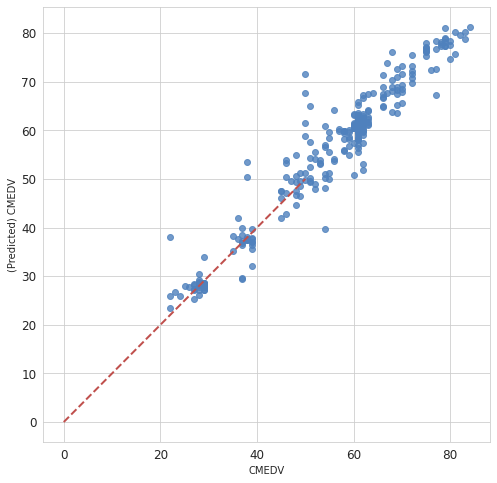

In [32]:
# 描画設定
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 12       # x軸のラベルのフォントサイズ
rcParams['ytick.labelsize'] = 12       # y軸のラベルのフォントサイズ
rcParams['figure.figsize'] = 8,8      # 画像サイズの変更(inch)

import matplotlib.pyplot as plt
from matplotlib import ticker
sns.set_style("whitegrid")             # seabornのスタイルセットの一つ
sns.set_color_codes()                  # デフォルトカラー設定 (deepになってる)

plt.figure()
ax = sns.regplot(x=Y_test, y=bestmodel.predict(X_test), fit_reg=False,color='#4F81BD')
ax.set_xlabel(u"CMEDV")
ax.set_ylabel(u"(Predicted) CMEDV")
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
ax.plot([0,10,20,30,40,50],[0,10,20,30,40,50], linewidth=2, color="#C0504D",ls="--")

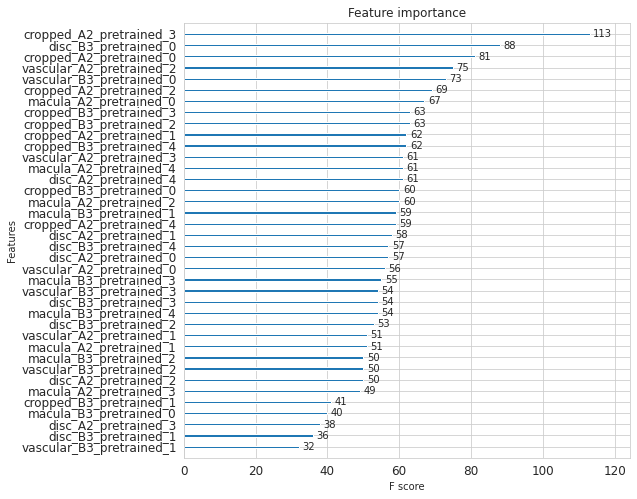

In [19]:
xgb.plot_importance(bestmodel)

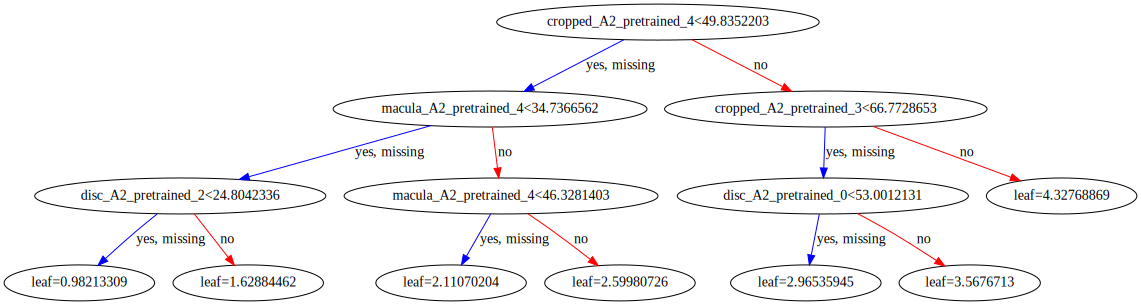

In [20]:
xgb.to_graphviz(bestmodel, num_trees=5)


#**Analysis using RandomForest**
https://hinomaruc.hatenablog.com/entry/2019/11/14/200857

In [27]:
#Create model
import numpy as np
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train,Y_train) 

"""
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=2525, verbose=0, warm_start=False)
"""



#　　精度確認
# 自由度調整済みr2を算出
def adjusted_r2(X,Y,model):
    from sklearn.metrics import r2_score
    import numpy as np
    r_squared = r2_score(Y, model.predict(X))
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    #yhat = model.predict(X) \ #SS_Residual = sum((Y-yhat)**2) \ #SS_Total = sum((Y-np.mean(Y))**2)
    #r_squared = 1 - (float(SS_Residual))/ SS_Total
    return adjusted_r2

# 予測モデルの精度確認の各種指標を算出
def get_model_evaluations(X_train,Y_train,X_test,Y_test,model):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_log_error
    from sklearn.metrics import median_absolute_error

   # 評価指標確認
   # 参考: https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
    yhat_test = model.predict(X_test)
    return "adjusted_r2(train)     :" + str(adjusted_r2(X_train,Y_train,model)) \
         , "adjusted_r2(test)      :" + str(adjusted_r2(X_test,Y_test,model)) \
         , "平均誤差率(test)       :" + str(np.mean(abs(Y_test / yhat_test - 1))) \
         , "MAE(test)              :" + str(mean_absolute_error(Y_test, yhat_test)) \
         , "MedianAE(test)         :" + str(median_absolute_error(Y_test, yhat_test)) \
         , "RMSE(test)             :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test))) \
         , "RMSE(test) / MAE(test) :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test)) / mean_absolute_error(Y_test, yhat_test)) #better if result = 1.253

get_model_evaluations(X_train,Y_train,X_test,Y_test,model)

('adjusted_r2(train)     :0.9954431575406175',
 'adjusted_r2(test)      :0.9772256508006482',
 '平均誤差率(test)       :0.02786731706413976',
 'MAE(test)              :1.4303886925795053',
 'MedianAE(test)         :0.8999999999999986',
 'RMSE(test)             :2.1436074742204014',
 'RMSE(test) / MAE(test) :1.4986188616708833')

In [42]:
#Grid search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,Y_train)



print('ベストスコア:',grid.best_score_, sep="\n")
print('\n')
print('ベストestimator:',grid.best_estimator_,sep="\n")
print('\n')
print('ベストparams:',grid.best_params_,sep="\n")

print(pd.DataFrame(grid.cv_results_))

# Grid Searchで一番精度が良かったモデル
bestmodel = grid.best_estimator_
get_model_evaluations(X_train,Y_train,X_test,Y_test,bestmodel)

NameError: ignored

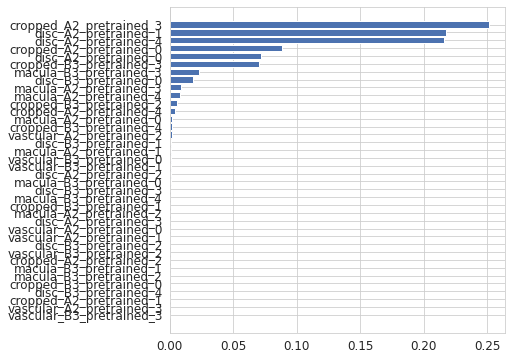

,features,importances
0,cropped_A2_pretrained_3,0.250994
1,disc_A2_pretrained_1,0.21747
2,disc_A2_pretrained_4,0.216138
3,cropped_A2_pretrained_0,0.0885058
4,disc_A2_pretrained_0,0.0721064
5,cropped_B3_pretrained_3,0.0703756
6,macula_B3_pretrained_3,0.0234359
7,disc_B3_pretrained_0,0.0185523
8,macula_A2_pretrained_3,0.00869831
9,macula_A2_pretrained_4,0.00780331


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()


feature_importances = pd.DataFrame([features, importances]).T
feature_importances.columns = ['features', 'importances']
df_s = feature_importances.sort_values('importances', ascending=False).reset_index(drop=True)
df_s

In [ ]:
"""
plt.figure(figsize=(8,8))
plt.title('Importances')
plt.rcParams['font.size']=10
sns.barplot(y='features', x='importances', data=df_s, palette='viridis')
"""

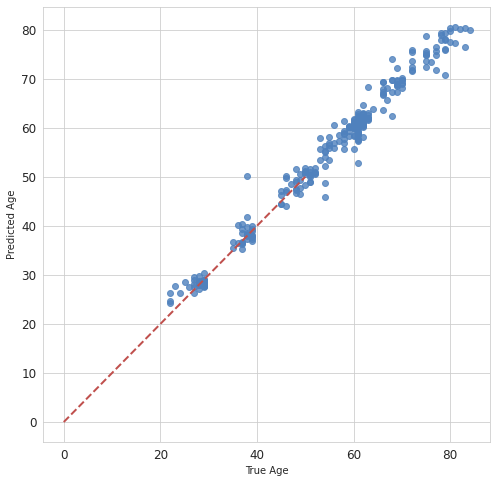

In [23]:
# 描画設定
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 12       # x軸のラベルのフォントサイズ
rcParams['ytick.labelsize'] = 12       # y軸のラベルのフォントサイズ
rcParams['figure.figsize'] = 8,8      # 画像サイズの変更(inch)

import matplotlib.pyplot as plt
from matplotlib import ticker
sns.set_style("whitegrid")             # seabornのスタイルセットの一つ
sns.set_color_codes()                  # デフォルトカラー設定 (deepになってる)

plt.figure()
ax = sns.regplot(x=Y_test, y=model.predict(X_test), fit_reg=False,color='#4F81BD')
ax.set_xlabel(u"True Age")
ax.set_ylabel(u"Predicted Age")
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
ax.plot([0,10,20,30,40,50],[0,10,20,30,40,50], linewidth=2, color="#C0504D",ls="--")

#**Analysis using neural network**

In [ ]:
#正規化する
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

#モデル作成
import numpy as np
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate='adaptive', max_iter=500, random_state=42, solver="lbfgs", early_stopping=True) 
model.fit(X_train,Y_train) 


"""
初期設定：

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
"""


# 自由度調整済みr2を算出
def adjusted_r2(X,Y,model):
    from sklearn.metrics import r2_score
    import numpy as np
    r_squared = r2_score(Y, model.predict(X))
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    #yhat = model.predict(X) \ #SS_Residual = sum((Y-yhat)**2) \ #SS_Total = sum((Y-np.mean(Y))**2)
    #r_squared = 1 - (float(SS_Residual))/ SS_Total
    return adjusted_r2

# 予測モデルの精度確認の各種指標を算出
def get_model_evaluations(X_train,Y_train,X_test,Y_test,model):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_log_error
    from sklearn.metrics import median_absolute_error

   # 評価指標確認
   # 参考: https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
    yhat_test = model.predict(X_test)
    return "adjusted_r2(train)     :" + str(adjusted_r2(X_train,Y_train,model)) \
         , "adjusted_r2(test)      :" + str(adjusted_r2(X_test,Y_test,model)) \
         , "平均誤差率(test)       :" + str(np.mean(abs(Y_test / yhat_test - 1))) \
         , "MAE(test)              :" + str(mean_absolute_error(Y_test, yhat_test)) \
         , "MedianAE(test)         :" + str(median_absolute_error(Y_test, yhat_test)) \
         , "RMSE(test)             :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test))) \
         , "RMSE(test) / MAE(test) :" + str(np.sqrt(mean_squared_error(Y_test, yhat_test)) / mean_absolute_error(Y_test, yhat_test)) #better if result = 1.253

get_model_evaluations(X_train,Y_train,X_test,Y_test,model)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


('adjusted_r2(train)     :0.9985855464473465',
 'adjusted_r2(test)      :0.9232505451500271',
 '平均誤差率(test)       :0.0559891829790846',
 'MAE(test)              :2.9263694308576333',
 'MedianAE(test)         :2.0810153147193873',
 'RMSE(test)             :4.108713223309058',
 'RMSE(test) / MAE(test) :1.4040309401759006')

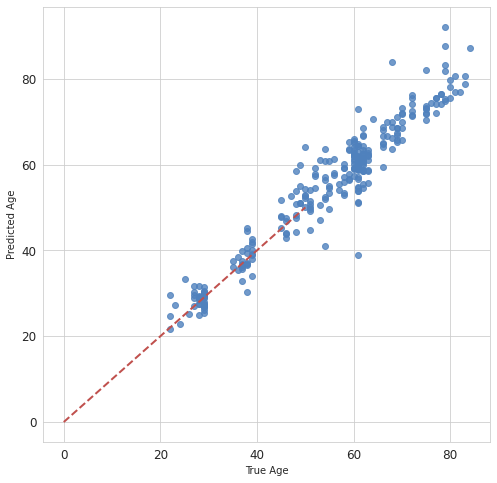

In [ ]:
# 描画設定
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 12       # x軸のラベルのフォントサイズ
rcParams['ytick.labelsize'] = 12       # y軸のラベルのフォントサイズ
rcParams['figure.figsize'] = 8,8      # 画像サイズの変更(inch)

import matplotlib.pyplot as plt
from matplotlib import ticker
sns.set_style("whitegrid")             # seabornのスタイルセットの一つ
sns.set_color_codes()                  # デフォルトカラー設定 (deepになってる)

plt.figure()
ax = sns.regplot(x=Y_test, y=model.predict(X_test), fit_reg=False,color='#4F81BD')
ax.set_xlabel(u"True Age")
ax.set_ylabel(u"Predicted Age")
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
ax.plot([0,10,20,30,40,50],[0,10,20,30,40,50], linewidth=2, color="#C0504D",ls="--")